In [1]:
from __future__ import print_function
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from urllib import urlopen
import os
from IPython import get_ipython
import string
import sys

%matplotlib inline

Setup=[\
       [23166,50,1,'BPP','BPP_LP',''],\
       [23167,50,0.5,'BPP','BPP_LP',''],\
       [23169,50,2,'BPP','BPP_LP',''],\
       [23170,200,2,'BPP_LP','BPP',"DAS fail, wrong plasma position determination "],\
       [23171,200,1,'BPP_LP','BPP','weak signal, fits fail'],\
       [23172,200,0.5,'BPP_LP','BPP',''],\
      ]
VacuumShot=23032
Probe_position='outer ruler: 74 mm => distance from the the BPP top from the plasma centre $d=70$ mm'
Base='http://golem.fjfi.cvut.cz/wikiraw/Experiments/EdgePlasmaPhysics/ParticleFlux/BallPenProbe/Experiments/BottomPosition/Sessions/020217SweepingDynamics_HS'

try:os.makedirs('GlobalFigs') 
except OSError:pass


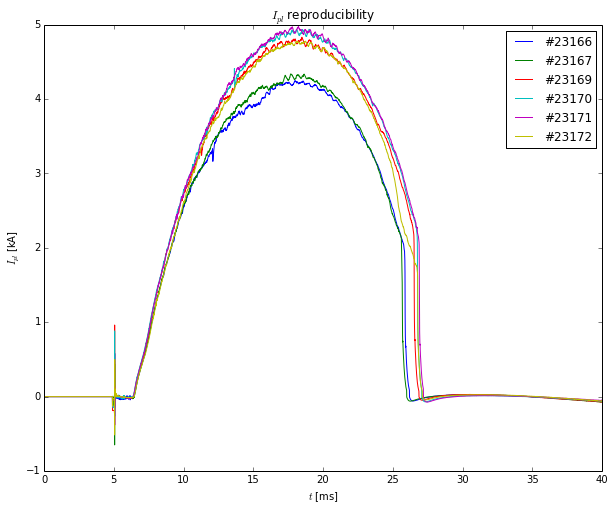

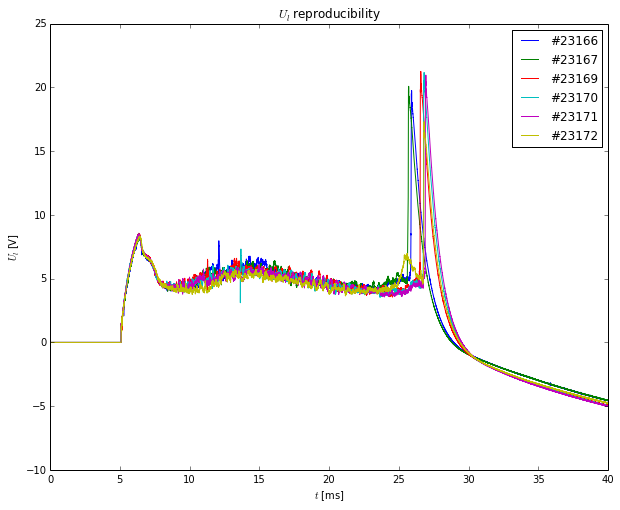

In [15]:
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
for j in Setup:
    ShotNo=j[0]
    url='http://golem.fjfi.cvut.cz/utils/data/'+ str(ShotNo) +'/plasma_current'
    file=urlopen(url)
    X=np.loadtxt(file)
    plt.plot(X[:,0]*1000,X[:,1]/1000,label='#'+str(ShotNo));
    

plt.ylabel('$I_{pl}$ [kA]')
plt.xlabel('$t$ [ms]')
plt.title('$I_{pl}$ reproducibility')
plt.legend(loc=0)
plt.savefig('GlobalFigs/ReproducibilityIpl.jpg', bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
for j in Setup:
    ShotNo=j[0]
    url='http://golem.fjfi.cvut.cz/utils/data/'+ str(ShotNo) +'/loop_voltage'
    file=urlopen(url)
    X=np.loadtxt(file)
    plt.plot(X[:,0]*1000,X[:,1],label='#'+str(ShotNo));
    

plt.ylabel('$U_{l}$ [V]')
plt.xlabel('$t$ [ms]')
plt.title('$U_{l}$ reproducibility')
plt.legend(loc=0)
plt.savefig('GlobalFigs/ReproducibilityUl.jpg', bbox_inches='tight')
plt.show()
plt.close()

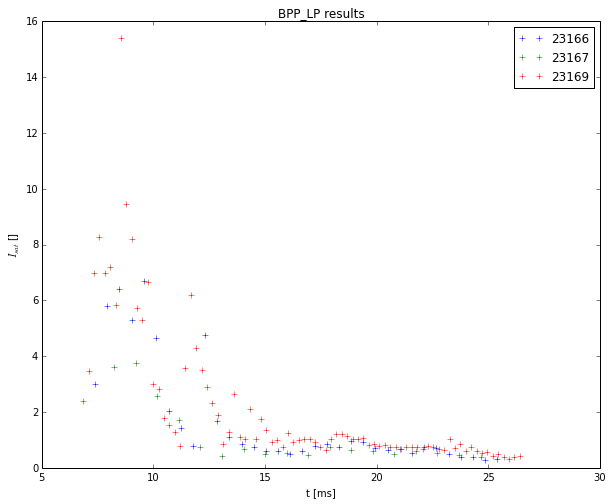

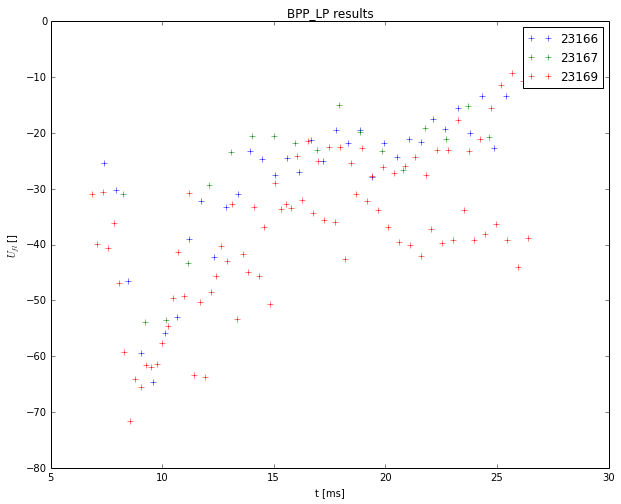

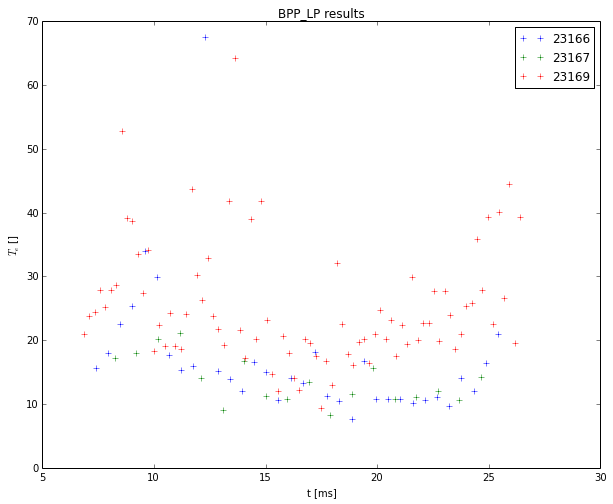

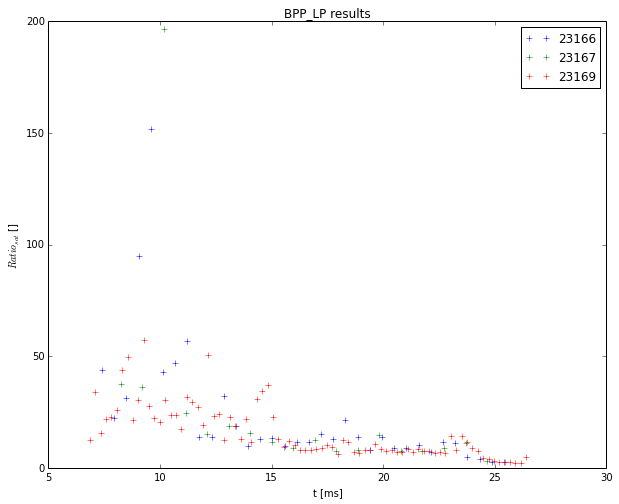

In [6]:
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
for i in 166,167,169:
    Results=np.loadtxt(urlopen(Base+'/23'+str(i)+'/Data/Results'))
    plt.plot(Results[0:,3],Results[0:,12],'+',label=str(23000+i))

plt.ylabel('$I_{sat}$ []')
plt.xlabel('t [ms]')
plt.title('BPP_LP results')
plt.legend(loc=1)
plt.savefig('GlobalFigs/ResultsIsat.jpg', bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
for i in 166,167,169:
    Results=np.loadtxt(urlopen(Base+'/23'+str(i)+'/Data/Results'))
    plt.plot(Results[0:,3],Results[0:,13],'+',label=str(23000+i))

plt.ylabel('$U_{fl}$ []')
plt.xlabel('t [ms]')
plt.title('BPP_LP results')
plt.legend(loc=1)
plt.savefig('GlobalFigs/ResultsUfl.jpg', bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
for i in 166,167,169:
    Results=np.loadtxt(urlopen(Base+'/23'+str(i)+'/Data/Results'))
    plt.plot(Results[0:,3],Results[0:,14],'+',label=str(23000+i))

plt.ylabel('$T_{e}$ []')
plt.xlabel('t [ms]')
plt.title('BPP_LP results')
plt.legend(loc=1)
plt.savefig('GlobalFigs/ResultsTe.jpg', bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
for i in 166,167,169:
    Results=np.loadtxt(urlopen(Base+'/23'+str(i)+'/Data/Results'))
    plt.plot(Results[0:,3],Results[0:,15],'+',label=str(23000+i))

plt.ylabel('$Ratio_{sat}$ []')
plt.xlabel('t [ms]')
plt.title('BPP_LP results')
plt.legend(loc=1)
plt.savefig('GlobalFigs/ResultsRatio.jpg', bbox_inches='tight')
plt.show()
plt.close()

In [3]:
print("html generation ...")

os.system('rm index.html');
fileid = open('index.html','a+')
fileid.write('<html><head><title>VA char @ GOLEM</title>\
<style>\
div.grafy30 {display:inline-block;width: 30%;}\
div.grafy20 {display:inline-block;width: 20%;}\
.grafy20 img {width: 100%;}\
.grafy30 img {width: 100%;}\
</style>\
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\
<style></style>\
<script type="text/x-mathjax-config">MathJax.Hub.Config({tex2jax: {inlineMath: [[\'$\',\'$\'], [\'\\(\',\'\\)\']]}});</script>\
<script src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script>\
</head><body><center>')
fileid.write('<h2>BPP experiments @ the tokamak GOLEM</h2>')
fileid.write('<h3>Essential parameters:</h3><table><tr><td><ul>\
<li>Date: 020217</li>\
<li>Probe position:'+Probe_position+'</li>\
<li>Vacuum shot /plasma position issues/:<a href="http://golem.fjfi.cvut.cz/shots/'+str(VacuumShot)+'">'+str(VacuumShot)+'</a></li>\
</ul></td></tr></table>')
fileid.write('<div class="grafy30"><h2>Experimental setup</h2>')
fileid.write('<h3>Ball pen probe @ North-East port</h3>')
fileid.write('<center>\
<a href="http://golem.fjfi.cvut.cz/wikiraw/Experiments/EdgePlasmaPhysics/ParticleFlux/BallPenProbe/Experiments/BottomPosition/setup/vI/ExpSetup-BPP.png">\
<img src="setup/ExpSetup-BPP.png" width="100%"></a><br>\
<a href="'+Base+'/setup/">setup</a></div>\
<h2>Discharges involved</h2>\
<table border="1"><tr>\
<th>Discharge #</th>\
<th>$f$ [kHz]</th>\
<th>$R [\Omega]$</th>\
<th>Potential measured @</th>\
<th>Sweeped VA char @</th>\
<th>Analysis</th>\
<th>Comment</th></tr>')
for i in Setup: 
    fileid.write('<tr>\
    <td><a href="http://golem.fjfi.cvut.cz/shots/'+str(i[0])+'">#'+str(i[0])+'</td>\
    <td>'+str(i[2])+'</td>\
    <td>'+str(i[1])+'</td>\
    <td>'+i[3]+'</td>\
    <td>'+i[4]+'</td>\
    <td><a href="'+Base+'/'+str(i[0])+'">link</td>\
    <td>'+i[5]+'</td>\
    </tr>')
fileid.write('<h2>Reproducibility</h2>\
<a href="GlobalFigs/ReproducibilityIpl.jpg"><img src="GlobalFigs/ReproducibilityIpl.jpg" width="30%"></a>\
<a href="GlobalFigs/ReproducibilityUl.jpg"><img src="GlobalFigs/ReproducibilityUl.jpg" width="30%"></a><br/>')
fileid.write('<h2>Results comparatively</h2>\
<a href="GlobalFigs/ResultsIsat.jpg"><img src="GlobalFigs/ResultsIsat.jpg" width="30%"></a>\
<a href="GlobalFigs/ResultsUfl.jpg"><img src="GlobalFigs/ResultsUfl.jpg" width="30%"></a><br/>\
<a href="GlobalFigs/ResultsTe.jpg"><img src="GlobalFigs/ResultsTe.jpg" width="30%"></a>\
<a href="GlobalFigs/ResultsRatio.jpg"><img src="GlobalFigs/ResultsRatio.jpg" width="30%"></a>')
fileid.write('</table><h2>References</h2>')
fileid.write('<ul>\
<li><a href="https://www.mathworks.com/matlabcentral/fileexchange/19312-langmuir-probe-data-analysis-code">Aasim Azooz: Langmuir probe data analysis code. Mathworks.</a></li>\
</ul>')
fileid.write('</body></html>')
fileid.close()

html generation ...
